# Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. Two examples are shown in Fig.2 for n= 2 functions.

![icpc_reflections.png](icpc_reflections.png "ShowMyImage")

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

<h1>
    $f_m$ for m = 0

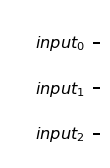

0


In [13]:
# Importing the qiskit module
from qiskit import *


q0 =   3  # number of required qubits
a0 =   0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    

    
    ########################################
    
    # Uncomment to draw quantum circuit
    #display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ

qc_0 = Circuit_0(q0,a0)

<h1>
    $f_m$ for m = 1

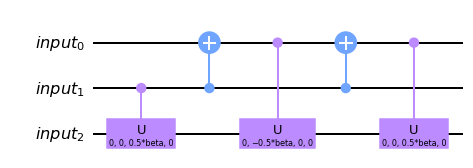

14


In [14]:
# Importing the qiskit module
from qiskit import *
import math


q1 =  3   # number of required qubits
a1 =  0  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_1(q,a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    Circ.mcrz(beta, [Q[0], Q[1]], Q[2])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    #display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ
param = circuit.Parameter('beta')
qc_1 = Circuit_1(q1,a1, param)

<h1>
    $f_m$ for m = 2

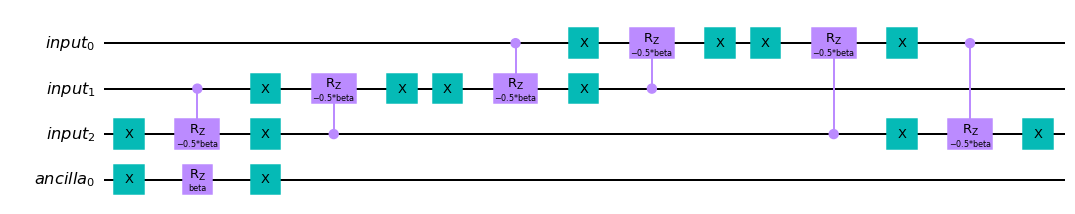

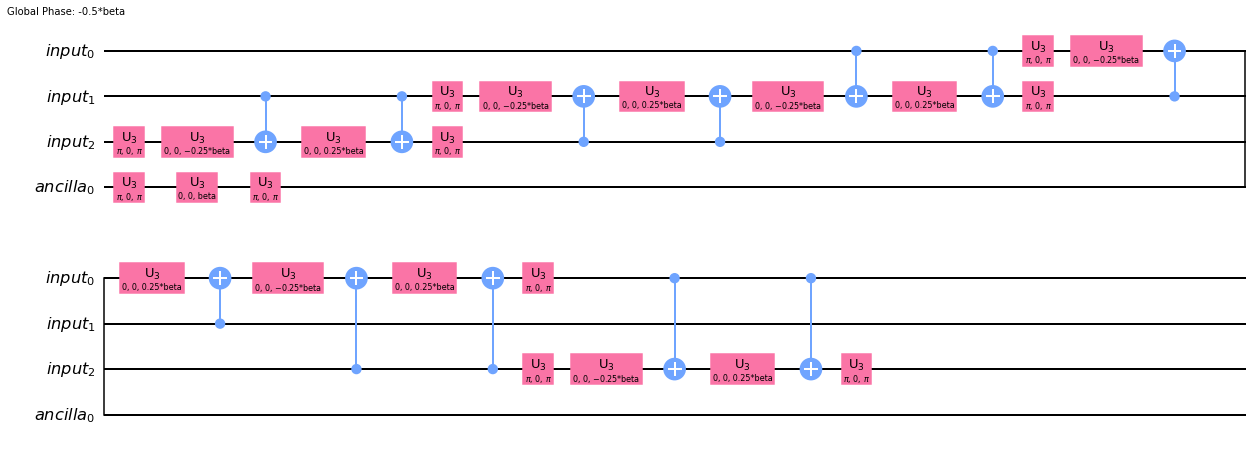

29


In [40]:
# Importing the qiskit module
from qiskit import *


q2 =  3  # number of required qubits
a2 =  1 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    

    for i in range(3):
        Circ.x(2 - i)
        Circ.crz(-0.5 * beta, Q[(1 - i)%3], Q[2 - i])
        Circ.x(Q[2 - i])
        Circ.x(Q[1 - i])
        Circ.crz(-0.5 * beta, Q[2 - i], Q[(1 - i)%3])
        Circ.x(Q[1 - i])
    
    Circ.x(A[0])
    Circ.rz(beta, A[0])
    Circ.x(A[0])
    '''
    Circ.mcrz(beta, [Q[0], Q[1]], Q[2])
    Circ.x([0, 1, 2])
    Circ.mcrz(beta, [Q[0], Q[1]], Q[2])
    Circ.x([0, 1, 2])
    '''
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ

param = circuit.Parameter('beta')
qc_2 = Circuit_2(q2,a2, param)

<h1>
    $f_m$ for m = 3

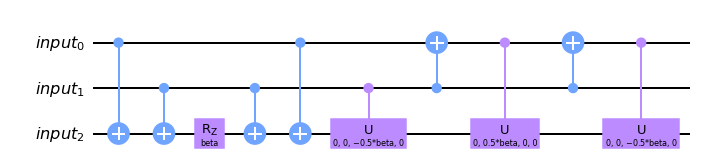

19


In [16]:
# Importing the qiskit module
from qiskit import *


q3 =  3  # number of required qubits
a3 =  0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    for i in range(2):
        Circ.cx(Q[i], Q[2])
    
    Circ.rz(beta, Q[2])
    
    for i in range(2):
        Circ.cx(Q[1-i], Q[2])
        
    Circ.mcrz(-beta, [Q[0], Q[1]], Q[2])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    #display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ
param = circuit.Parameter('beta')
qc_3 = Circuit_3(q3,a3, param)

<h1>
    $f_m$ for m = 4

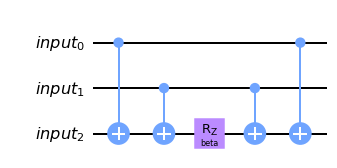

5


In [17]:
# Importing the qiskit module
from qiskit import *


q4 = 3   # number of required qubits
a4 = 0  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_4(q,a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    for i in range(2):
        Circ.cx(Q[i], Q[2])  
    
    Circ.rz(beta, Q[2])
    
    for i in range(2):
        Circ.cx(Q[1-i], Q[2])
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    #display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ
param = circuit.Parameter('beta')
qc_4 = Circuit_4(q4,a4, param)

### Grader

In [32]:
all_circuits = [qc_0, qc_1, qc_2, qc_3, qc_4]
from qc_grader import grade_ex3

grade_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 607.
Feel free to submit your answer.



# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

### Submission for evaluation 

In [11]:
## Uncomment and run the following code to submit
from qc_grader import submit_ex3

submit_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Submitting your answer for ex3. Please wait...
Oops 😕! Your answer is incorrect
Make sure your answer is correct and successfully graded before submitting.
